# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Data Science 2: Advanced Topics in Data Science 
## Homework 5: Language Modeling


**Harvard University**<br/>
**Spring 2022**<br/>
**Instructors**: Mark Glickman & Pavlos Protopapas


<hr style="height:2pt">

In [ ]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/"
    "content/styles/cs109.css"
).text
HTML(styles)

<hr style="height:2pt">

### INSTRUCTIONS

- This homework can be submitted **in pairs**.

- To submit your assignment follow the instructions given in Canvas.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate and report $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "Training and validation MSE at varying degree polynomial regression models" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

<hr style="height:2pt">

## **HOMEWORK QUIZ**

**For each part of the homework, there is an associated quiz on edStem. You are required to attempt that after completing each section of this homework.**

## **Setup Notebook**

**Imports**

In [ ]:
import requests
import re
import os
import zipfile
import collections
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
from IPython.core.display import HTML

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import backend as K
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split

**Verify Setup**

In [ ]:
# Enable/Disable Eager Execution
# Reference: https://www.tensorflow.org/guide/eager
# TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, 
# without building graphs

#tf.compat.v1.disable_eager_execution()
#tf.compat.v1.enable_eager_execution()

print("tensorflow version", tf.__version__)
print("keras version", tf.keras.__version__)
print("Eager Execution Enabled:", tf.executing_eagerly())

# Get the number of replicas 
strategy = tf.distribute.MirroredStrategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

devices = tf.config.experimental.get_visible_devices()
print("Devices:", devices)
print(tf.config.experimental.list_logical_devices('GPU'))

print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("All Physical Devices", tf.config.list_physical_devices())

# Better performance with the tf.data API
# Reference: https://www.tensorflow.org/guide/data_performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

tensorflow version 2.8.0
keras version 2.8.0
Eager Execution Enabled: True
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of replicas: 1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
All Physical Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]



    
## **PART 1 [35 points]: Language Modeling using ngrams**
<br />    

You have been tasked with developing a language model to complete messages that for some reason arrive incomplete to a disaster response station. Given the delicate situation, you will have to be extra careful. Each word in the sentence conveys a lot of information, and improper handling of the data could cause someone to come to harm. 

Your language model will be based on bigrams. You'll develop your own sub-word tokenization to analyze dissaster messages from multiple natural disasters. All the sentences are translated into English.
    
    

    

### **PART 1: Questions**
<br />

### **1.1 [5 points] PREPROCESS THE DATASET**
<br />

**1.1.1** - Read in the dataset `disaster_response_messages_training.csv` and select only the column "message" and display the head of the DataFrame.
<br /><br />

**1.1.2** - Define a function `clean_data` that takes the data frame as input, converts the characters to lower case and removes any special characters that you might consider irrelevant,  adds the start token `<s>` and the end token `</s>` to every sentence (row) in the data frame and returns the processed data frame. 
<br /><br />


**1.1.3** - Split the dataset into train and test sets. The proportion should be 0.95 and 0.05, respectively. You will create the language model based on the train set and validate your results on the test set.
<br /><br />    



    
### **1.2 [8 points] TOKENIZE AND COUNT**
<br />
In this section, you will create three different tokenizers that you will build LM based on. The tokenization functions must divide the text into tokens, count their frequency and return a dictionary with a mapping of token to number.
    
**1.2.1** - Create your own tokenization function ('tokenizer_1') based on whitespace. Set the vocabulary size to 1000, including the `<UNK>` token for out of the vocabulary (OOV) words. 
<br /><br />

**1.2.2** - Create a second tokenization function ('tokenizer_2') based on whitespace, but do not limit the vocabulary size.
<br /><br />

**1.2.3** - Create a third tokenization function ('tokenizer_3') based on sub-words. You have to define a set of common sub-words in the English language, for example, the subtokens _ing_ and _n't_.
    
In this example, the sentence "_It is raining outside_" would be tokenized as [_It_, _is_, _rain_, _ing_, _outside_ ].
<br /><br />
    
    
    
### **1.3 [6 points] CONSTRUCTING BIGRAMS**
<br />

**1.3.1** - Using each of the tokenizer functions you created, split each sentence into tokens in their numerical representation. 
<br /><br />

**1.3.2** - For each tokenizer, count the occurances of each bigram in the dataset and divide them by the total number of bigrams. This will give you the probability of each bigram.
<br /><br />
    
    
    
### **1.4 [8 points] PREDICTING THE NEXT WORDS**
<br />

**1.4.1** - Simulate incomplete messages by dividing each sentence of the test set in two. The first $75\%$ will represent the received message, and the final $25\%$ will convey the missing information. You will use this dataset to evaluate the predictions of your language model.
    
For example in the sentence: *"I will go out on a vacation, now that my semester ended."*

The first 75% will be *"I will go out on a vacation, now"*

The last 25% will be *"that my semeter ended"*

Your aim is to predict the last part by giving your model the first "part" of the sentence.


Note that in an n-gram language model, only the last $n-1$ words are used to make a prediction. For example, for the above sentence, if you are using bigrams, the input to your model would only be "now" and you are expected to predict "that".
    
<br /><br />    
    
**1.4.2** - Given 5 sentences from the previous question (test set), predict the next word. 
Append this predicted word to the input sequence and predict the next one. Repeat this process until you reach the 10th predicted token or the end of a sentence. Compare your results qualitatively with the original sentences. Do the results make sense wrt the context and semantics?

Repeat this for all the models built using different tokenization techniques.
<br /><br />

**1.4.3** - Repeat the same exercise, for all 3 models, but this time, the next token will be sampled from a distribution given by the bigram frequency. Compare and comment on the results?


*Hint:* In a model of two bigrams with frequencies 0.7 and 0.3, a deterministic prediction will only predict the first bigram. Sampling from a distribution, will enable the model to predict the second bigram with a probability of 0.3. In this way we can still predict infrequent tokens. 
<br /><br />
    

### **1.5 [5 points] EVALUATE THE LANGUAGE MODELS**
<br />

    
**1.5.1** - For each of the models built using different tokenization techniques, compute the average perplexity in the test set (These are the complete test messages as tokenized in 1.3.1, **not** the incomplete test messages from 1.4.1). Perform smoothing on the bigram models. Based on the perplexity, which model is better?
<br /><br />

**1.5.2** - Given the perplexities, which model do you think is better? Why do you think so? Does this reflect the quality of the prediction as seen in part 1.4? 
 What is the effect of UNK words?

<br /><br />

### **1.6 [3 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.

<br /><br />

</div>

## **PART 1: Solutions**

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### **1.1 [5 points] PREPROCESS THE DATASET**
<br />

**1.1.1** - Read in the dataset `disaster_response_messages_training.csv`. Select only the column "message" and display the head of the DataFrame.
<br />

If you want to download the file you can get it from [here](https://storage.googleapis.com/cs109b/nlp/disaster_response_messages_training.csv)
</div>

In [ ]:
file_path = "https://storage.googleapis.com/cs109b/nlp/disaster_response_messages_training.csv"
df = pd.read_csv(file_path)['message']
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


0    Weather update - a cold front from Cuba that c...
1              Is the Hurricane over or is it not over
2    says: west side of Haiti, rest of the country ...
3               Information about the National Palace-
4                       Storm at sacred heart of jesus
Name: message, dtype: object

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
**1.1.2** - Define a function `clean_data` that takes the data frame as input. Convert the characters to lower case and remove any special characters that you might consider irrelevant. Add the start token `<s>` and the end token `</s>` to every sentence (row) in the data frame. Return the processed data frame. 
    
</div>

In [ ]:
def clean_data(df):
  df = df.apply(lambda x : re.sub(r'[^a-zA-Z0\s]', '', x))
  df = df.apply(lambda x: "<s> " + x.lower() + " </s>")
  return df

df_clean = clean_data(df)
df_clean.head(100)

0     <s> weather update  a cold front from cuba tha...
1      <s> is the hurricane over or is it not over </s>
2     <s> says west side of haiti rest of the countr...
3        <s> information about the national palace </s>
4               <s> storm at sacred heart of jesus </s>
                            ...                        
95    <s> we are a group of police and we found a ki...
96    <s> dans la zone de saint etienne la route de ...
97    <s> we are hungry we are in the streets we wer...
98        <s> where they should go for water today </s>
99    <s> i dont know rue du muguet route de desprez...
Name: message, Length: 100, dtype: object

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.1.3** - Split the dataset into train and test sets. The proportion should be 0.95 and 0.05, respectively. You will create the language model based on the train set and validate your results on the test set.
<br /><br />  

</div>

In [ ]:
train, test = train_test_split(df_clean, test_size=0.05, random_state = 109)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.2 [8 points] TOKENIZE AND COUNT**
<br />
In this section, you will create three different tokenizers and build an LM based on each one of them. The tokenization functions must divide the text into tokens, count their frequency and return a dictionary with a mapping of token to number.
<br /><br />
    


**1.2.1** - Create your own tokenization function ('tokenizer_1') based on whitespace. Set the vocabulary to 1000, including the `<UNK>` token for Out Of the Vocabulary (OOV) words. 
<br /><br />
    
</div> 

In [ ]:
def tokenizer_1(df):
  string = []
  for i in df:
    string += i.split(" ")

  counter = collections.Counter(string)
  counter_ = dict(counter.most_common(999))
  uncommon = {x:v for (x,v) in dict(counter).items() if x not in counter_}
  uncommon_sum = sum(uncommon.values())
  counter_["<UNK>"] = sum(uncommon.values())
  
  return counter_

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.2.2** - Create a second tokenization function ('tokenizer_2') based on whitespace, but do not limit the vocabulary size.
<br /><br />
    
</div>

In [ ]:
def tokenizer_2(df):
  string = []
  for i in df:
    string += i.split(" ")
  counter = dict(collections.Counter(string))
  counter["<UNK>"] = 0
  return counter

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.2.3** - Create a third tokenization function ('tokenizer_3') based on sub-words. You have to define a set of common sub-words in the English language, for example, the subtokens _ing_ and _n't_.
    
In this example, the sentence "_It is raining outside_" would be tokenized as [_It_, _is_, _rain_, _ing_, _outside_ ].
<br /><br />
    
</div>

In [ ]:
def tokenizer_3(df):
  list_common_subt = ['ing', 'ed', "n't", "tion"]
  for i in list_common_subt:
    df = df.str.replace(i, " "+i+" ")
  string = []
  for i in df:
    string += i.split(" ")
  counter = dict(collections.Counter(string))
  counter["<UNK>"] = 0
  return counter

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.3 [7 points] CONSTRUCTING BIGRAMS**
<br />

**1.3.1** - Using each of the tokenizer functions you created, split each sentence into tokens in their numerical representation. 
<br /><br />
    
</div>

In [ ]:
# create dictionaries
def word2idx(tk, train):
  return {word: idx for idx, word in enumerate(tk(train))}, {idx: word for idx, word in enumerate(tk(train))}

# encode text based on tokenizer and train dataset 
def numerical_representation(tk, df, train):
  word2idx_, _= word2idx(tk, train)

  if tk == tokenizer_3:
    list_common_subt = ['ing', 'ed', "n't", "tion"]
    for i in list_common_subt:
      df = df.str.replace(i, " "+i+" ")
  
  df_proc = df.apply(lambda x: [word2idx_[word] if word in word2idx_.keys() else word2idx_['<UNK>'] for word in x.split(" ")])

  return df_proc

**Tokenizer_1**

In [ ]:
# Your code here
train_num_1 = numerical_representation(tokenizer_1, train, train)
test_num_1 = numerical_representation(tokenizer_1, test, train)
test_num_1.head()

11857    [1, 0, 136, 459, 999, 54, 50, 84, 20, 7, 3, 99...
13270    [1, 456, 130, 7, 253, 999, 17, 999, 999, 4, 84...
3278         [1, 68, 610, 999, 122, 386, 5, 377, 24, 3, 2]
10309    [1, 999, 39, 0, 334, 989, 999, 11, 89, 8, 999,...
15925    [1, 63, 0, 999, 830, 8, 174, 861, 5, 34, 819, ...
Name: message, dtype: object

**Tokenizer_2**

In [ ]:
# Your code here
train_num_2 = numerical_representation(tokenizer_2, train, train)
test_num_2 = numerical_representation(tokenizer_2, test, train)
test_num_2.head()

11857    [0, 21, 170, 2031, 10737, 89, 58, 74, 202, 39,...
13270    [0, 657, 2281, 39, 646, 1798, 3, 279, 13171, 9...
3278     [0, 198, 2221, 3265, 650, 2291, 12, 704, 43, 1...
10309    [0, 3023, 273, 21, 3129, 5838, 1244, 266, 673,...
15925    [0, 183, 21, 8652, 3660, 4, 85, 2448, 12, 200,...
Name: message, dtype: object

**Tokenizer_3**

In [ ]:
# Your code here
train_num_3 = numerical_representation(tokenizer_3, train, train)
test_num_3 = numerical_representation(tokenizer_3, test, train)
test_num_3.head()

11857    [0, 21, 123, 1960, 9963, 94, 62, 79, 205, 41, ...
13270    [0, 648, 2189, 41, 637, 1743, 25, 19, 3, 281, ...
3278     [0, 201, 2135, 3120, 641, 2199, 12, 694, 45, 1...
10309    [0, 2892, 275, 21, 2994, 4753, 1224, 268, 664,...
15925    [0, 187, 21, 8057, 3485, 4, 90, 2345, 12, 203,...
Name: message, dtype: object

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.3.2** - For each tokenizer, count the occurances of each bigram in the dataset and divide them by the total number of bigrams. This will give you the probability of each bigram.
<br /><br />
    
</div>

In [ ]:
def bigram(sentence):
  bigrams = [(sentence[i], sentence[i+1]) for i in range(0,len(sentence)-1)]
  return bigrams

def bigram_prob(tk, train):
  df_num = numerical_representation(tk,train,train)
  freq = tk(train)

  all_bigram = []
  for i in df_num:
    all_bigram += bigram(i)

  counter = collections.Counter(all_bigram)
  out = pd.DataFrame.from_dict(counter, orient='index').reset_index().rename(columns={'index':'bigram', 0:'count'})
  out['first'] = out['bigram'].str[0]
  #out['total'] = out['first'].apply(lambda x: list(freq.items())[x][-1])
  out['total'] = out['count'].groupby(out['first']).transform('sum')
  out['prob'] = out['count']/out['total']
  out['prob'] = (1 + out['count'])/(out['total'] + len(freq)) # apply smoothing
  out = out[['first','bigram','prob']]

  return out

In [ ]:
# tokenizer 1
bigram_1 = bigram_prob(tokenizer_1, train)
bigram_1.head()

,first,bigram,prob
0,1,"(1, 9)",0.084981
1,9,"(9, 111)",0.001099
2,111,"(111, 17)",0.016050
3,17,"(17, 8)",0.045442
4,8,"(8, 452)",0.004482


In [ ]:
# tokenizer 2
bigram_2 = bigram_prob(tokenizer_2, train)
bigram_2.head()


,first,bigram,prob
0,0,"(0, 1)",0.034073
1,1,"(1, 2)",0.000186
2,2,"(2, 3)",0.000701
3,3,"(3, 4)",0.004792
4,4,"(4, 5)",0.000954


In [ ]:
# tokenizer 3
bigram_3 = bigram_prob(tokenizer_3, train)
bigram_3.head()

,first,bigram,prob
0,0,"(0, 1)",0.035823
1,1,"(1, 2)",0.000227
2,2,"(2, 3)",0.000754
3,3,"(3, 4)",0.005169
4,4,"(4, 5)",0.001018


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.4 [9 points] PREDICTING THE NEXT WORDS**
<br />

**1.4.1** - Simulate incomplete messages by dividing each sentence of the test set in two. The first $75\%$ will represent the received message, and the final $25\%$ will convey the missing information. You will use this dataset to evaluate the predictions of your language model.
    
Note that in an n-gram language model, only the last $n-1$ words are used to make a prediction. 
    
For example in the sentence "A star is an astronomical object consisting of a luminous spheroid of plasma", the first $75\%$ is aproximately "A star is an astronomical object consisting of a" and $25\%$ "luminous spheroid of plasma".
<br /><br />
    
</div>

In [ ]:
# Your code here
def get_fragment(string, fragment=75):
  lst = string.split(" ")
  # get either first 75 or last 25
  if fragment == 75:
    ind = int(len(lst)*0.75)
    out = lst[:ind]
  else:
    ind = int(len(lst)*0.75)
    out = lst[ind:]

  return " ".join(out)

test_75 = test.apply(lambda x: get_fragment(x))
test_25 = test.apply(lambda x: get_fragment(x, fragment=25))

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


**1.4.2** - For five sentence fragments of the test set, predict the next token. Append the predicted token to the sentence and predict the next one. Repeat this process until you reach the 10th predicted token or the end of a sentence. Compare your results with the original sentences. Do the results make sense?
<br /><br />
    
</div>

In [ ]:
def predict_sent(sentence, bigram, word2idx, idx2word, sample=False):
  """ predict remaining sentence fragment
  """
  predicted_words = []
  last_word_idx = sentence[-1]
  s = 0

  #predict 10 words or until predicting end of sentence
  while s <10 and idx2word[last_word_idx] != '</s>':

    if idx2word[last_word_idx] == '<UNK>':
      next_word_idx = word2idx['<UNK>']
      predicted_words.append(idx2word[next_word_idx])
      last_word_idx = next_word_idx
      s += 1

    else:
      # filter bigram df to bigram beginning with last word
      bigram_filtered = bigram[bigram['bigram'].str[0] == last_word_idx].sort_values(by='prob', ascending=False)

        # if not sampling, next word is at index 0 after sorting
      if sample==False:
        idx = 0

        # else, if sampling, next word is sampled from multinomial
      else:
        idx = np.argmax(np.random.multinomial(1, bigram_filtered['prob']))

        # get next word prediction
      next_word_idx = bigram_filtered['bigram'].iloc[idx][-1]

        # append to list
      predicted_words.append(idx2word[next_word_idx])

        # update last word
      last_word_idx = next_word_idx
        # update counter
      s += 1

  return predicted_words

def predict(train, test, tk, sample=False):
  word2idx_, idx2word_ = word2idx(tk, train)
  bigram = bigram_prob(tk, train)
  test_num = numerical_representation(tk, test, train)
  predict = []

  for sentence in test_num:
    if sample==False:
      predict.append(predict_sent(sentence, bigram, word2idx_, idx2word_, sample=False))
    else:
      predict.append(predict_sent(sentence, bigram, word2idx_, idx2word_, sample=True))

  return pd.Series(predict)

**Tokenizer1**

In [ ]:
# get prediction
pred_1 = predict(train, test_75[:5], tokenizer_1, sample=False)

# print prediction
for (sentence, (i, j, k)) in enumerate(zip(test_75[:5], pred_1, test_25[:5])):
  print("Sentence ", sentence+1)
  print("First fragment: ", i)
  print("Predicted completion: ", " ".join(j))
  print("Actual last fragment: ", k, "\n")

Sentence  1
First fragment:  <s> the flood control headquarters said some 000 people in  townships in zhangjiajie city have been evacuated
Predicted completion:  to <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
Actual last fragment:  because of the flooding threat </s> 

Sentence  2
First fragment:  <s> monsoon rains in pakistan coupled with glacial melting and flash floods have claimed nine lives and affected over 000 people in the provinces of punjab khyber pakhtunkhwa gilgit baltistan and baluchistan causing
Predicted completion:  <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
Actual last fragment:  urban flooding in the major cities of lahore rawalpindi and islamabad </s> 

Sentence  3
First fragment:  <s> where does pam give card to receive
Predicted completion:  <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
Actual last fragment:  food  </s> 

Sentence  4
First fragment:  <s> oh my the west side highway is now a canal sandy battery park httptcokh

**Tokenizer2**

In [ ]:
# get prediction
pred_2 = predict(train, test_75[:5], tokenizer_2, sample=False)

# print prediction
for (sentence, (i, j, k)) in enumerate(zip(test_75[:5], pred_2, test_25[:5])):
  print("Sentence ", sentence+1)
  print("First fragment: ", i)
  print("Predicted completion: ", " ".join(j))
  print("Actual last fragment: ", k, "\n")

Sentence  1
First fragment:  <s> the flood control headquarters said some 000 people in  townships in zhangjiajie city have been evacuated
Predicted completion:  to the earthquake in the earthquake in the earthquake in
Actual last fragment:  because of the flooding threat </s> 

Sentence  2
First fragment:  <s> monsoon rains in pakistan coupled with glacial melting and flash floods have claimed nine lives and affected over 000 people in the provinces of punjab khyber pakhtunkhwa gilgit baltistan and baluchistan causing
Predicted completion:  widespread flooding in the earthquake in the earthquake in the
Actual last fragment:  urban flooding in the major cities of lahore rawalpindi and islamabad </s> 

Sentence  3
First fragment:  <s> where does pam give card to receive
Predicted completion:  the earthquake in the earthquake in the earthquake in the
Actual last fragment:  food  </s> 

Sentence  4
First fragment:  <s> oh my the west side highway is now a canal sandy battery park httptcok

**Tokenizer3**

In [ ]:
pred_3 = predict(train, test_75[:5], tokenizer_3, sample=False)

# print prediction
for (sentence, (i, j, k)) in enumerate(zip(test_75[:5], pred_3, test_25[:5])):
  print("Sentence ", sentence+1)
  print("First fragment: ", i)
  print("Predicted completion: ", " ".join(j))
  print("Actual last fragment: ", k, "\n")

Sentence  1
First fragment:  <s> the flood control headquarters said some 000 people in  townships in zhangjiajie city have been evacuated
Predicted completion:  </s>
Actual last fragment:  because of the flooding threat </s> 

Sentence  2
First fragment:  <s> monsoon rains in pakistan coupled with glacial melting and flash floods have claimed nine lives and affected over 000 people in the provinces of punjab khyber pakhtunkhwa gilgit baltistan and baluchistan causing
Predicted completion:  </s>
Actual last fragment:  urban flooding in the major cities of lahore rawalpindi and islamabad </s> 

Sentence  3
First fragment:  <s> where does pam give card to receive
Predicted completion:  the earthquake in the earthquake in the earthquake in the
Actual last fragment:  food  </s> 

Sentence  4
First fragment:  <s> oh my the west side highway is now a canal sandy battery park httptcokhuoamamhurricane survival food peanutbutter fluff cookies popcorn chips candles frankenstorm astoria ny httptc

**Answer**

Tokenizer 1 predicts "UNK" for all sentences because the vocabulary size is very small. The other tokernizers do a little better but the predictions are still bad compared to the real sentences as they are based on pure word frequency in the data and have very little context information.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.4.3** - Repeat the same exercise, but this time, the next token will be _sampled_ from a distribution given by the bigram frequency. Are the results better?

In a model of two bigrams with frequencies 0.7 and 0.3, a deterministic prediction will only predict the first bigram. Sampling from a distribution, will enable the model to predict the second bigram with a probability of 0.3. In this way we can still predict infrequent tokens. 
<br /><br />
    
</div>

**Tokenizer_1**

In [ ]:
# Your code here
pred_1 = predict(train, test_75[:5], tokenizer_1, sample=True)

# print prediction
for (sentence, (i, j, k)) in enumerate(zip(test_75[:5], pred_1, test_25[:5])):
  print("Sentence ", sentence+1)
  print("First fragment: ", i)
  print("Predicted completion: ", " ".join(j))
  print("Actual last fragment: ", k, "\n")

Sentence  1
First fragment:  <s> the flood control headquarters said some 000 people in  townships in zhangjiajie city have been evacuated
Predicted completion:  power and the evacuation team was <UNK> <UNK> <UNK> <UNK>
Actual last fragment:  because of the flooding threat </s> 

Sentence  2
First fragment:  <s> monsoon rains in pakistan coupled with glacial melting and flash floods have claimed nine lives and affected over 000 people in the provinces of punjab khyber pakhtunkhwa gilgit baltistan and baluchistan causing
Predicted completion:  temporary school thank of flash about such times she came
Actual last fragment:  urban flooding in the major cities of lahore rawalpindi and islamabad </s> 

Sentence  3
First fragment:  <s> where does pam give card to receive
Predicted completion:  cash back against <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK>
Actual last fragment:  food  </s> 

Sentence  4
First fragment:  <s> oh my the west side highway is now a canal sandy battery park httptcokhu

**Tokenizer_2**

In [ ]:
pred_2 = predict(train, test_75[:5], tokenizer_2, sample=True)

# print prediction
for (sentence, (i, j, k)) in enumerate(zip(test_75[:5], pred_2, test_25[:5])):
  print("Sentence ", sentence+1)
  print("First fragment: ", i)
  print("Predicted completion: ", " ".join(j))
  print("Actual last fragment: ", k, "\n")

Sentence  1
First fragment:  <s> the flood control headquarters said some 000 people in  townships in zhangjiajie city have been evacuated
Predicted completion:  power off its regional allies are barely surviving we change
Actual last fragment:  because of the flooding threat </s> 

Sentence  2
First fragment:  <s> monsoon rains in pakistan coupled with glacial melting and flash floods have claimed nine lives and affected over 000 people in the provinces of punjab khyber pakhtunkhwa gilgit baltistan and baluchistan causing
Predicted completion:  reactors to emro </s>
Actual last fragment:  urban flooding in the major cities of lahore rawalpindi and islamabad </s> 

Sentence  3
First fragment:  <s> where does pam give card to receive
Predicted completion:  bread provided another air i dothe despair the massive amount
Actual last fragment:  food  </s> 

Sentence  4
First fragment:  <s> oh my the west side highway is now a canal sandy battery park httptcokhuoamamhurricane survival food pe

**Tokenizer_3**

In [ ]:
pred_3 = predict(train, test_75[:5], tokenizer_3, sample=True)

# print prediction
for (sentence, (i, j, k)) in enumerate(zip(test_75[:5], pred_3, test_25[:5])):
  print("Sentence ", sentence+1)
  print("First fragment: ", i)
  print("Predicted completion: ", " ".join(j))
  print("Actual last fragment: ", k, "\n")

Sentence  1
First fragment:  <s> the flood control headquarters said some 000 people in  townships in zhangjiajie city have been evacuated
Predicted completion:  mt sinabungs tectonic quakes construc tion of croplivestock and alur
Actual last fragment:  because of the flooding threat </s> 

Sentence  2
First fragment:  <s> monsoon rains in pakistan coupled with glacial melting and flash floods have claimed nine lives and affected over 000 people in the provinces of punjab khyber pakhtunkhwa gilgit baltistan and baluchistan causing
Predicted completion:  safer migra tion  safer migra tion of croplivestock and
Actual last fragment:  urban flooding in the major cities of lahore rawalpindi and islamabad </s> 

Sentence  3
First fragment:  <s> where does pam give card to receive
Predicted completion:  bread provid ing dead so now func tion  </s>
Actual last fragment:  food  </s> 

Sentence  4
First fragment:  <s> oh my the west side highway is now a canal sandy battery park httptcokhuoamamh

**Answer**

The first tokenizer is still the worst-performing. The results are different but not neccessarily better than the previous version.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **1.5 [6 points] EVALUATE THE LANGUAGE MODELS**
<br />

    
**1.5.1** - For each of your models, compute the average perplexity on the test set (These are the complete test messages as tokenized in 1.3.1, **not** the incomplete test messages from 1.4.1). If the tokens of the test set are not present in the train split, define a minimum probability. Based on this metric, which model is better?
<br /><br />
    
</div>

In [ ]:
from tqdm.notebook import tqdm_notebook

In [ ]:
# Your code here
def perplexity(train, test, tk):
  bigram_df = bigram_prob(tk, train)
  test_num = numerical_representation(tk, test, train)
  pp_list = []
  for i, sent  in tqdm_notebook(enumerate(test_num), total=len(test_num)):
    bigram_list = bigram(sent)
    if len(bigram_list) > 0:
      pp = 0
      for b in bigram_list:
        if b in bigram_df['bigram'].tolist():
          pp += np.log(bigram_df[bigram_df['bigram'] == b]['prob'].values[0])
        else:
          pp += np.log(1/len(tk(train)))
      pp = np.exp(pp*(-1/(len(sent))))
      pp_list.append(pp)
    else:
      pass
  return np.mean(pp_list)

In [ ]:
pp_1 = perplexity(train, test, tokenizer_1)
pp_2 = perplexity(train, test, tokenizer_2)
pp_3 = perplexity(train, test, tokenizer_3)
print("Perplexity 1: ", pp_1)
print("Perplexity 2: ", pp_2)
print("Perplexity 3: ", pp_3)

  0%|          | 0/1053 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

Perplexity 1:  56.278831873858365
Perplexity 2:  3496.0359841170325
Perplexity 3:  1646.3356487014084


In [ ]:
pp_1

56.278831873858365

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**1.5.2** - Given the perplexities, which model do you think is better? Why do you think so? Does this reflect the quality of the prediction as seen in part 1.4? 
 What is the effect of UNK words?
<br /><br />
    
</div>

**Answer**

According to the perplexity score, the first model is the best as it has the lowest perplexity score. This does not reflect the quality of the prediction as seen in part 1.4. Given how the perplexity is calculated as a product of probability, and tokenizer 1 has the lowest vocab size and thus its bigrams have higher probablity than the other models. 

___
___


## **PART 2 [35 points] : Language Modelling using RNNs**
<br />    

In this part of the homework, you are to build and train a new language model. For this, we will be using Prof. Protopapas's famous texts which end with `...` for prediction. Here, you will preprocess a data corpus and train your simple RNN network with it. With this network you will try to predict what he meant when he typed `...`. For this task we will use a form of transfer learning: first training a network on the larger dataset, such as IMDB reviews, and then 'fine tuning' the network to the professor's texts.
<br /><br />
    
</div>

## **PART 2: Questions**
<br />

### **2.1 [2 points] PREPROCESS THE DATASET**
<br />

**2.1.1** - Read in the dataset `imdb.csv`. Create a new dataframe by splitting each review into individual sentences. The sentences can be delimited by different characters such as period and question mark (eroteme). Call this column as `text` in the new dataframe.
<br /><br />

**2.1.2** - Define a function `clean_data` that takes the new dataframe as input and removes all html tags and non-alphabetic characters from the dataframe. Additionally, convert all characters to lower case. Remove all the sentences where the number of words is less than 10 and higher than 30. Finally, add the start token `<s>` and the end token `</s>` to every sentence (row) in the dataframe. Return the processed the dataframe. 
<br /><br />

### **2.2 [2 points] TOKENIZE THE DATASET**
<br />

**2.2.1** - Instantiate a Tokenizer for the dataset using `tensorflow.keras.preprocessing.text.Tokenizer` with a vocabulary size of 5000. Do **not** use an additional token for unknown, out of vocabulary words (oov). That is, you will **not** have the equivalent of the `<UNK>` token.
<br /><br />

**2.2.2** - Fit the tokenizer on the dataset and get the sequence representation of each sentence.
<br /><br />

### **2.3 [10 points] MODELLING THE DATA**
<br />

**2.3.1** - The first step is to split the dataset into the predictors ($X$) and the response ($Y$). The predictors for each observation (sentence) are all tokens in that sentence _except_ the **last** token. The response for a given sentence is all tokens in that sentence _except_ the **first**. Using `tf.keras.preprocessing.sequence.pad_sequences` post-pad each sequence in $X$ and $Y$ to a length of 30.
    
**Hint:** You may need to use `tf.convert_to_tensor` on the objects returned by the padding operation. 
```
Example:
if token for <s> = 1 and </s> = 2
sentence_i = [1, 48, 2498, 22, 16, 4, 4, 1554, 149, 14, 22, 2]
x_i = [1, 48, 2498, 22, 16, 4, 4, 1554, 149, 14, 2, 0, ..., 0]
y_i = [1, 2498, 22, 16, 4, 4, 1554, 149, 14, 22, 2, 0, ..., 0]
```
<br /><br />

**2.3.2** - Define a simple RNN model that has an embedding layer with an embedding dimension of 300. You can define any number of RNN layers. The output of the RNN model will be a dense layer with size of the vocabulary and softmax activation. Using the functional API here may make it easier to reuse parts of the network later on.
<br /><br />

**2.3.3** - Train the model with the $X$ and $Y$ data formed in 2.3.1. Use a validation split of 0.2. The choice of number epochs and batch size is left to you.
<br /><br />

**2.3.4** - Plot the train and validation loss from the training history.
<br /><br />

### **2.4 [9 points] PREDICTING THE NEXT WORD**
<br />

**2.4.1** - Read the dataset `pp_text.csv`. Add the start and end tokens to each line and tokenize it. Convert each sentence to a sequence vector and post-pad to a length of 30. This will be the input for the prediction phase.
<br /><br />

**2.4.2** - For predicting the next word, use the trained RNN model from above. 

NOTE - Based on your implementation, the output of the RNN model might have to be different from that of your trained network. You can make use of Keras function API for this.
<br /><br />

**2.4.3** - Choose any sentence from the list of Pavlos' texts to predict the next word. Input this to the RNN model built for prediction and print the predicted word. Try this out with multiple sentences.
<br /><br />

**2.4.4** - Do you notice any pattern in the predicted words? Do they seem approriate to the context of the texts as you understand it? What do you attribute this discrepency to? How can you resolve it?

Answer in less than 150 words.
<br /><br />

### **2.5 [6 points] TRAINING AND PREDICTING WITH A DIFFERENT DATASET**
<br />

**2.5.1** - Read the dataset `cleaned_sarcasm.csv`. This dataset has been preprocessed for you, all you need to do is tokenize, convert to sequence and pad it, similar to 2.2.1, 2.2.2 and 2.3.1.
<br /><br />

**2.5.2** - Train your RNN model with this data and plot the train and validation trace plot. This part is similar to 2.3.2, 2.3.3 and 2.3.4.
<br /><br />

**2.5.3** - Repeat 2.4.1, 2.4.2 and 2.4.3 with the RNN model trained using the new dataset.
<br /><br />

**2.5.4** - How do the results with the new dataset compare to the previous ones? Why do you think so? 

Answer in less than 100 words.
<br /><br />
    
### **2.6 [3 points] COMPLETING THE SENTENCE**
<br />

**2.6.1** Until now we have predicted a single word for a given sentence. However, what if he meant more than one word when he typed in `...`

We will now predict multiple words for each input sentence. To do this we will first predict one word, append this word to the input text and then predict one more with the updated input. Continue doing this for 5 words or until the end token `</s>` (whichever comes first). 
<br /><br />

### **2.7 [3 points] HOMEWORK QUIZ**
<br />
After attempting this part of the homework, answer the questions on edStem. All the questions depend on this part of the homework and you will not be able to answer them without attempting this part.

<br />



---

## **PART 2: Solutions**

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### **2.1 [2 points] PREPROCESS THE DATASET**
<br />    

**2.1.1** - Read in the dataset `imdb.csv`. Create a new dataframe by splitting each review into individual sentences. The sentences can be delimited by different characters such as period and question mark (eroteme). Call this column as `text` in the new dataframe.
</div>

In [ ]:
# Read the data
file_path = "https://storage.googleapis.com/cs109b/nlp/imdb.csv"
data = pd.read_csv(file_path, encoding='latin1')
data.head()

,text,polarity
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [ ]:
data_text = data[['text']]
data_text.head()

,text
0,"first think another Disney movie, might good, ..."
1,"Put aside Dr. House repeat missed, Desperate H..."
2,"big fan Stephen King's work, film made even gr..."
3,watched horrid thing TV. Needless say one movi...
4,truly enjoyed film. acting terrific plot. Jeff...


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.1.2** - Define a function `clean_data` that takes the new dataframe as input and removes all html tags and non-alphabetic characters from the dataframe. Additionally, convert all characters to lower case. Remove all the sentences where the number of words is less than 10 and higher than 30. Finally, add the start token `<s>` and the end token `</s>` to every sentence (row) in the dataframe. Return the processed the dataframe. 
    
</div>

In [ ]:
# Your code here
def clean_data(df):
  df['text'] = df['text'].apply(lambda x : re.sub(r'<br /><br />', '', x))
  df['text'] = df['text'].apply(lambda x : re.sub(r'[^a-zA-Z0\s]', '', x))
  df['new'] = df['text'].apply(lambda x: x.split(" "))
  df['cnt'] = df['new'].apply(lambda x: len(x))
  df = df[(df['cnt']  >= 10) & (df['cnt']  <= 30)]
  df['text'] = df['text'].apply(lambda x: "<s> " + x.lower() + " </s>")

  #df = df.loc[(df['cnt'] > 10)&(df['cnt'] < 30),:]
  return df['text']

clean_data_ = clean_data(data_text)
clean_data_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

8       <s> real classic shipload sailors trying get t...
14      <s> great movie could soylent green scenes peo...
27      <s> sometimes want laugh dont you analyzing cr...
51      <s> shallow shallow script stilted acting the ...
68      <s> boring badly written italian exploitation ...
                              ...                        
9834    <s> uptight voyeur wants commit suicide encoun...
9844    <s> brilliant kungfu scenes loads melodrama pe...
9849    <s> script movie probably found hairball recen...
9980    <s> never child love movie one would love it w...
9986    <s> movie ok kids gotta tell ya scratch little...
Name: text, Length: 354, dtype: object

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### **2.2 [2 points] TOKENIZE THE DATASET**
    
<br />

**2.2.1** - Instantiate a Tokenizer for the dataset using `tensorflow.keras.preprocessing.text.Tokenizer` with a vocabulary size of 5000. Do **not** use an additional token for unknown, out of vocabulary words (oov). That is, you will **not** have the equivalent of the `<UNK>` token.
</div>

In [ ]:
# Your code here
from keras.preprocessing.text import Tokenizer
my_max = 5000
tokenizer = Tokenizer(num_words=my_max, filters='!"#$%&()*+,-.:;=?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(clean_data_)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.2.2** - Fit the tokenizer on the dataset and get the sequence representation of each sentence.
    
</div>

In [ ]:
# Your code here
sequences = tokenizer.texts_to_sequences(clean_data_)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
### **2.3 [10 points] MODELLING THE DATA**
    
**2.3.1** - The first step is to split the dataset into the predictors ($X$) and the response ($Y$). The predictors for each observation (sentence) are all tokens in that sentence _except_ the **last** token. The response for a given sentence is all tokens in that sentence _except_ the **first**. Using `tf.keras.preprocessing.sequence.pad_sequences` post-pad each sequence in $X$ and $Y$ to a length of 30.
    
```
Example:
if token for <s> = 1 and </s> = 2
sentence_i = [1, 48, 2498, 22, 16, 4, 4, 1554, 149, 14, 22, 2]
x_i = [1, 48, 2498, 22, 16, 4, 4, 1554, 149, 14, 2, 0, ..., 0]
y_i = [1, 2498, 22, 16, 4, 4, 1554, 149, 14, 22, 2, 0, ..., 0]
```
**Hint:** You may need to use `tf.convert_to_tensor` on the objects returned by the padding operation. 
</div>    

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = [sentence[:-1] for sentence in sequences]
y_train = [sentence[1:] for sentence in sequences]

MAX_LEN = 500
X_train = pad_sequences(X_train, maxlen=30, padding='post') #padding='post' will pad in the end of a sequence
y_train = pad_sequences(y_train, maxlen=30, padding='post')


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
**2.3.2** - Define a simple RNN model that has an embedding layer with an embedding dimension of 300. You can define any number of RNN layers. The output of the RNN model will be a dense layer with size of the vocabulary and softmax activation. Using the functional API here may make it easier to reuse parts of the network later on.
    
</div>

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Flatten, Reshape #GRU, LSTM

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import Input

In [ ]:
# Construct a CNN
inputs = Input((30,))
x = Embedding(5000, 300, input_length=30, mask_zero=True)(inputs)
x = SimpleRNN(250, return_sequences=True)(x)
x = Dense(5000, activation="softmax")(x)

model1 = Model(inputs=inputs, outputs=x, name="Model1")
model1.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam' , metrics=['accuracy'])
model1.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           1500000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 30, 250)           137750    
                                                                 
 dense (Dense)               (None, 30, 5000)          1255000   
                                                                 
Total params: 2,892,750
Trainable params: 2,892,750
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.3.3** - Train the model with the $X$ and $Y$ data formed in 2.3.1. Use a validation split of 0.2. The choice of number epochs and batch size is left to you.
    
</div>

In [ ]:
# Your code here
history = model1.fit(X_train,y_train, epochs=100, batch_size=64, verbose=0, validation_split=0.2)
trainPredict = model1.predict(X_train)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.3.4** - Plot the train and validation loss from the training history.

</div>

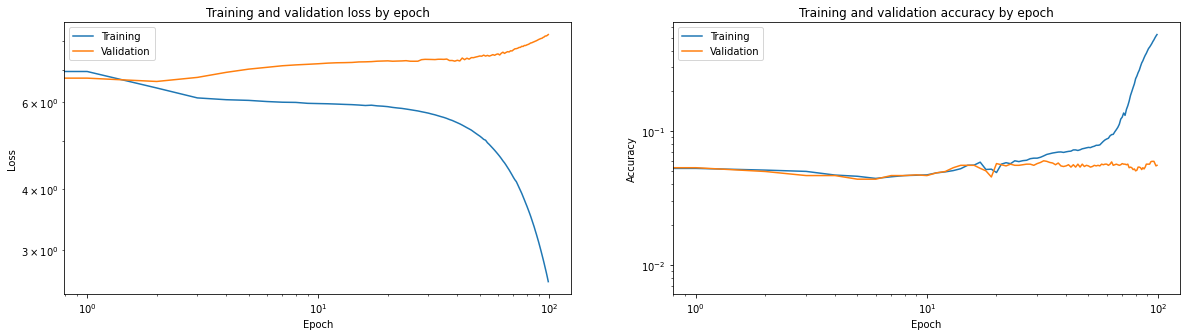

In [ ]:
# Your code here
def plot_loss_acc(history):
    train_loss = history.history['loss'] 
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy']

    fig, ax = plt.subplots(1, 2, figsize = (20,5))
    ax[0].loglog(train_loss, label = 'Training')
    ax[0].loglog(val_loss, label = 'Validation')
    ax[0].set_title('Training and validation loss by epoch')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].loglog(train_acc, label = 'Training')
    ax[1].loglog(val_acc, label = 'Validation')
    ax[1].set_title('Training and validation accuracy by epoch')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    plt.show()
    pass

plot_loss_acc(history)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **2.4 [10 points] PREDICTING THE NEXT WORD**
    
<br />
    
**2.4.1** - Read the dataset `pp_text.csv`. Add the start and end tokens to each line and tokenize it. Convert each sentence to a sequence vector and post-pad to a length of 30. This will be the input for the prediction phase.
    
</div>

In [ ]:
# Read the data
file_path = "https://storage.googleapis.com/cs109b/nlp/pp_text.csv"
df_pred = pd.read_csv(file_path)
df_pred.head()

,Text
0,When you make changes please always check if e...
1,I found them very similar
2,Give some overview of what the exercises are a...
3,Honestly I do not remember
4,Can you check the video


In [ ]:
# Your code here
def clean_data(df):
  # df['Text'] = df['Text'].apply(lambda x: "<s> " + x.lower() + " </s>")
  df['Text'] = df['Text'].apply(lambda x: "<s> " + x.lower())
  # here we are removing end token before padding so we get better prediction, even though the earlier question asked us to add the end token.
  return df['Text']

clean_data_ = clean_data(df_pred)
clean_data_

0     <s> when you make changes please always check ...
1                         <s> i found them very similar
2     <s> give some overview of what the exercises a...
3                        <s> honestly i do not remember
4                           <s> can you check the video
5                            <s> a&a when you have time
6     <s> otherwise we will need to start working on it
7     <s> i do believe these students will know cnns...
8                                    <s> they are ready
9            <s> today i have as much as you can handle
10                           <s> almost done until then
11                       <s> ok the video is super cool
12                               <s> this is for me fun
13                                    <s> not much time
14                                  <s> for main course
15                                 <s> time to think of
16                       <s> could you share the slides
17                       <s> or we should write 

In [ ]:
sequences = tokenizer.texts_to_sequences(clean_data_)

In [ ]:
X_test = pad_sequences(sequences, maxlen=30, padding='post') #padding='post' will pad in the end of a sequence

In [ ]:
X_test_end_removed = np.where(X_test==2, 0, X_test)

In [ ]:
X_test_end_removed[0]

array([   1,  148,   44, 2609,   75,  688,  481,  744,  246, 1712,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


**2.4.2** - Define a simple RNN model with the trained weights of the trained RNN model for predicting the next word. You can make use of Keras function API to reuse the previously written code. The output of this new model is the last element of the RNN output.
    
</div>

In [ ]:
# Your code here
model2 = tf.keras.Model(model1.input, model1.output[:,-1,:])
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           1500000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 30, 250)           137750    
                                                                 
 dense (Dense)               (None, 30, 5000)          1255000   
                                                                 
 tf.__operators__.getitem_1   (None, 5000)             0         
 (SlicingOpLambda)                                               
                                                                 
Total params: 2,892,750
Trainable params: 2,892,750
Non-trainable params: 0
_________________________________________________

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.4.3** - Choose any sentence from the list of Prof. Protopapas's texts to predict the next word. Input this to the RNN model built for prediction and print the predicted word. Try this out with multiple sentences.
    
</div>

In [ ]:
X_test

array([[   1,  148,   44, ...,    0,    0,    0],
       [   1, 1057,  136, ...,    0,    0,    0],
       [   1,  109, 2316, ...,    0,    0,    0],
       ...,
       [   1, 1057,  522, ...,    0,    0,    0],
       [   1, 1057,   12, ...,    0,    0,    0],
       [   1, 1057,  358, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Your code here
y_hat = model2.predict(X_test)
y_hat_words_idx = np.argmax(y_hat, axis=1)
y_hat_words = tokenizer.sequences_to_texts([y_hat_words_idx])

In [ ]:
y_hat_words

['one real bad movie acting seen its think film thru ever movie one bad its ever bad </s> another bad unforgettable best bad its ive bad many script seen much own dont </s> bad film']

In [ ]:
y_hat_words = y_hat_words[0].split()
for idx, value in enumerate(y_hat_words):
  print(f'Predicted word for sentence {idx}: ', value)

Predicted word for sentence 0:  movie
Predicted word for sentence 1:  movie
Predicted word for sentence 2:  movie
Predicted word for sentence 3:  movie
Predicted word for sentence 4:  movie
Predicted word for sentence 5:  acting
Predicted word for sentence 6:  dont
Predicted word for sentence 7:  movie
Predicted word for sentence 8:  movie
Predicted word for sentence 9:  none
Predicted word for sentence 10:  ever
Predicted word for sentence 11:  best
Predicted word for sentence 12:  one
Predicted word for sentence 13:  movie
Predicted word for sentence 14:  quality
Predicted word for sentence 15:  movie
Predicted word for sentence 16:  believe
Predicted word for sentence 17:  doesnt
Predicted word for sentence 18:  high
Predicted word for sentence 19:  film
Predicted word for sentence 20:  response
Predicted word for sentence 21:  movie
Predicted word for sentence 22:  story
Predicted word for sentence 23:  ever
Predicted word for sentence 24:  movie
Predicted word for sentence 25:  mo

In [ ]:
clean_data_[1]


'<s> i found them very similar'

In [ ]:

for idx, value in enumerate(y_hat_words):
  print(f'Continued sentence:')
  print(f'{clean_data_[idx]}  {value}')

Continued sentence:
<s> when you make changes please always check if everything is working  movie
Continued sentence:
<s> i found them very similar  movie
Continued sentence:
<s> give some overview of what the exercises are and why they are there  movie
Continued sentence:
<s> honestly i do not remember  movie
Continued sentence:
<s> can you check the video  movie
Continued sentence:
<s> a&a when you have time  acting
Continued sentence:
<s> otherwise we will need to start working on it  dont
Continued sentence:
<s> i do believe these students will know cnns very well by the end  movie
Continued sentence:
<s> they are ready  movie
Continued sentence:
<s> today i have as much as you can handle  none
Continued sentence:
<s> almost done until then  ever
Continued sentence:
<s> ok the video is super cool  best
Continued sentence:
<s> this is for me fun  one
Continued sentence:
<s> not much time  movie
Continued sentence:
<s> for main course  quality
Continued sentence:
<s> time to think of

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.4.4** - Do you notice any pattern in the predicted words? Do they seem approriate to the context of the texts as you understand it? What do you attribute this discrepency to? How can you resolve it?

Answer in less than 150 words.
    
</div>

Most of them do not make sense. We are completing the sentences with words related to movies. This might be due to the fact that our training dataset is text of movies review, and we are testing on conversations with people. 


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


### **2.5 [7 points] TRAINING AND PREDICTING WITH A DIFFERENT DATASET**
<br />
    
**2.5.1** - Read the dataset `cleaned_sarcasm.csv`. This dataset has been preprocessed for you, all you need to do is tokenize, convert to sequence and pad it, similar to 2.2.1, 2.2.2 and 2.3.1.
    
</div>

In [ ]:
# Read the data
file_path = "https://cs109b-prod-course-data.s3.amazonaws.com/sarcasm_filtered.csv"
df = pd.read_csv(file_path)
df.head()

,text
0,you do know west teams play against west teams...
1,they were underdogs earlier today but since gr...
2,you dont have to you have a good build buy gam...
3,i think a significant amount would be against ...
4,ayy bb wassup it makes a bit more sense in con...


In [ ]:
def clean_data(df):
  # df['text'] = df['text'].apply(lambda x: "<s> " + x.lower() + " </s>")
  df['text'] = df['text'].apply(lambda x: "<s> " + x.lower()) # + " </s>")
  # we are not adding the end token for better prediction

  return df['text']

df = clean_data(df)
df

0         <s> you do know west teams play against west t...
1         <s> they were underdogs earlier today but sinc...
2         <s> you dont have to you have a good build buy...
3         <s> i think a significant amount would be agai...
4         <s> ayy bb wassup it makes a bit more sense in...
                                ...                        
289501    <s> if no one is aware multi culturalism is so...
289502    <s> i dont really need a notifier the envelope...
289503    <s> excellent idea now i just need data worth ...
289504    <s> texan judge orders microsoft to stop selli...
289505    <s> columbine is ten years old this year peopl...
Name: text, Length: 289506, dtype: object

In [ ]:
# Your code here
from keras.preprocessing.text import Tokenizer
my_max = 5000
tokenizer = Tokenizer(num_words=my_max, filters='!"#$%&()*+,-.:;=?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(df)
sequences = tokenizer.texts_to_sequences(df)
print(sequences)
X_train = []
y_train = []

for i in list(range(len(sequences))):
  sentence = sequences[i]
  # x_i = sentence[:-2] + [(sentence[-1])]
  # y_i = [sentence[0]] + sentence[2:]
  x_i = sentence[:-1]
  y_i = sentence[1:]
  X_train.append(x_i)
  y_train.append(y_i)

X_train = pad_sequences(X_train, maxlen=30, padding='post') #padding='post' will pad in the end of a sequence
y_train = pad_sequences(y_train, maxlen=30, padding='post')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.5.2** - Train your RNN model with this data and plot the train and validation trace plot. This part is similar to 2.3.2, 2.3.3 and 2.3.4.
    
</div>

In [ ]:
# Construct a CNN
inputs = Input((30,))
x = Embedding(5000+1, 300, input_length=30, mask_zero=True)(inputs)
x = SimpleRNN(250, return_sequences=True)(x)
x = Dense(5000, activation="softmax")(x)

model3 = Model(inputs=inputs, outputs=x, name="Model3")
model3.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam' , metrics=['accuracy'])
model3.summary()

# Your code here
history = model3.fit(X_train,y_train, epochs=15, batch_size=128, verbose=1, validation_split=0.2)

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 30, 300)           1500300   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30, 250)           137750    
                                                                 
 dense_1 (Dense)             (None, 30, 5000)          1255000   
                                                                 
Total params: 2,893,050
Trainable params: 2,893,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1810/1810 [==============================] - 102s 56ms/step - loss: 2.6869 - accuracy: 0.1125 - val_loss: 2.6858 - val_accuracy: 0.1371
Epoch 2/15
1810/1810 [=============

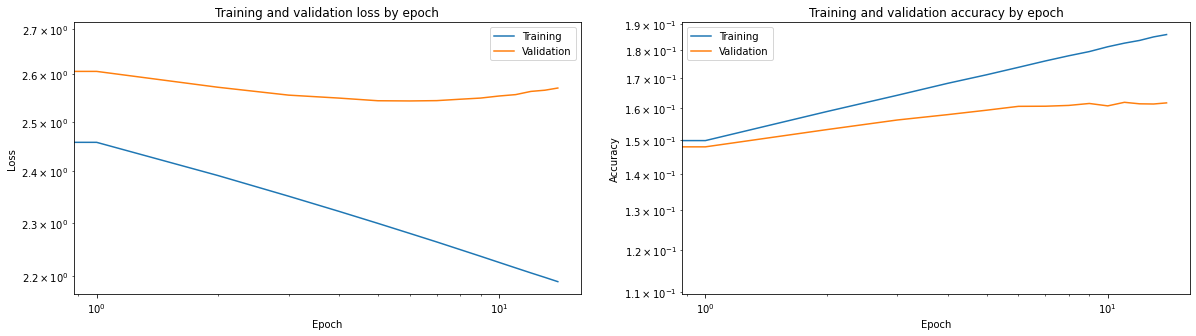

In [ ]:
# Your code here
def plot_loss_acc(history):
    train_loss = history.history['loss'] 
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy']

    fig, ax = plt.subplots(1, 2, figsize = (20,5))
    ax[0].loglog(train_loss, label = 'Training')
    ax[0].loglog(val_loss, label = 'Validation')
    ax[0].set_title('Training and validation loss by epoch')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].loglog(train_acc, label = 'Training')
    ax[1].loglog(val_acc, label = 'Validation')
    ax[1].set_title('Training and validation accuracy by epoch')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    plt.show()
    pass

plot_loss_acc(history)


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.5.3** - Repeat 2.4.1, 2.4.2 and 2.4.3 with the RNN model trained using the new dataset.

</div>

In [ ]:
# 2.4.1
# Read the data
file_path = "https://storage.googleapis.com/cs109b/nlp/pp_text.csv"
df_pred = pd.read_csv(file_path)
df_pred.head()



,Text
0,When you make changes please always check if e...
1,I found them very similar
2,Give some overview of what the exercises are a...
3,Honestly I do not remember
4,Can you check the video


In [ ]:
# Your code here

In [ ]:
# 2.4.1
# Your code here
# Your code here
def clean_data(df):
  #df['Text'] = df['Text'].apply(lambda x: "<s> " + x.lower() + " </s>")
  df['Text'] = df['Text'].apply(lambda x: "<s> " + x.lower())
  # we are not adding the end token here for better prediction
  return df['Text']

In [ ]:
clean_data_ = clean_data(df_pred)
clean_data_
sequences = tokenizer.texts_to_sequences(clean_data_)
X_test = pad_sequences(sequences, maxlen=30, padding='post') #padding='post' will pad in the end of a sequence


In [ ]:
# 2.4.2
# Your code here
model5 = tf.keras.Model(model3.input, model3.output[:,-1,:])
model5.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 30, 300)           1500300   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30, 250)           137750    
                                                                 
 dense_1 (Dense)             (None, 30, 5000)          1255000   
                                                                 
 tf.__operators__.getitem_2   (None, 5000)             0         
 (SlicingOpLambda)                                               
                                                                 
Total params: 2,893,050
Trainable params: 2,893,050
Non-trainable params: 0
_________________________________________________

In [ ]:
X_test[0]

array([  1,  51,   9,  78, 929, 267, 164, 468,  21, 234,  10, 373,   2,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [ ]:
X_test_end_removed = np.where(X_test==2, 0, X_test)

In [ ]:
X_test_end_removed[0]

array([  1,  51,   9,  78, 929, 267, 164, 468,  21, 234,  10, 373,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [ ]:
#2.4.3
# Your code here
y_hat = model5.predict(X_test)
y_hat_words_idx = np.argmax(y_hat, axis=1)
y_hat_words = tokenizer.sequences_to_texts([y_hat_words_idx])
y_hat_words

['on to to the on to for of to it the and to i is the of and to and a to to that to of that in with a if and but i and']

In [ ]:
y_hat_words = y_hat_words[0].split()
for idx, value in enumerate(y_hat_words):
  print(f'Predicted word for sentence {idx}: ', value)

for idx, value in enumerate(y_hat_words):
  print(f'Continued sentence:')
  print(f'{clean_data_[idx]}  {value}')

Predicted word for sentence 0:  on
Predicted word for sentence 1:  to
Predicted word for sentence 2:  to
Predicted word for sentence 3:  the
Predicted word for sentence 4:  on
Predicted word for sentence 5:  to
Predicted word for sentence 6:  for
Predicted word for sentence 7:  of
Predicted word for sentence 8:  to
Predicted word for sentence 9:  it
Predicted word for sentence 10:  the
Predicted word for sentence 11:  and
Predicted word for sentence 12:  to
Predicted word for sentence 13:  i
Predicted word for sentence 14:  is
Predicted word for sentence 15:  the
Predicted word for sentence 16:  of
Predicted word for sentence 17:  and
Predicted word for sentence 18:  to
Predicted word for sentence 19:  and
Predicted word for sentence 20:  a
Predicted word for sentence 21:  to
Predicted word for sentence 22:  to
Predicted word for sentence 23:  that
Predicted word for sentence 24:  to
Predicted word for sentence 25:  of
Predicted word for sentence 26:  that
Predicted word for sentence 2

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

**2.5.4** - How do the results with the new dataset compare to the previous ones? Why do you think so? 
    
</div>

**Type your answer here**

Predictions with the new dataset is better than the previous ones because the training data content is closer to the test data that we want to predict on. 


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


### **2.6 [4 points] COMPLETING THE SENTENCE**
<br />

**2.6.1** Until now we have predicted a single word for a given sentence. However, what if he meant more than one word when he typed in `...`

We will now predict multiple words for each input sentence. To do this we will first predict one word, append this word to the input text and then predict once more with the updated input. Continue doing this to predict 5 words or until the end token `</s>` (whichever comes first). 

</div>

In [ ]:
# Your code here

# Your code here
# sentence_idx = 1

sentence_idx_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

for sentence_idx in sentence_idx_: 
  last_token_idx = np.where(X_test[sentence_idx] == 0)[0][0]

  X_test_end_copy = np.copy(X_test[sentence_idx])
  predictions = [] 
  token = 1
  while len(predictions) < 5: #and token != tokenizer.word_index['</s>']:
    token = np.argmax(model5.predict(np.expand_dims(X_test_end_copy, axis=0)))
    predictions.append(token)
    X_test_end_copy[last_token_idx] = token 
    last_token_idx += 1
    # print(token, tokenizer.word_index['</s>'])

  print("Text sentence:", tokenizer.sequences_to_texts([X_test[sentence_idx]]))
  print("Predicted token:", tokenizer.sequences_to_texts([predictions]))

Text sentence: ['<s> i found them very similar']
Predicted token: ['to the of the population']
Text sentence: ['<s> give some of what the are and why they are there']
Predicted token: ['to be a lot of']
Text sentence: ['<s> i do not remember']
Predicted token: ['the last time i was']
Text sentence: ['<s> can you check the video']
Predicted token: ['on the back of the']
Text sentence: ['<s> a a when you have time']
Predicted token: ['to make a new one']
Text sentence: ['<s> otherwise we will need to start working on it']
Predicted token: ['for a long time and']
Text sentence: ['<s> i do believe these students will know very well by the end']
Predicted token: ['of the world and the']
Text sentence: ['<s> they are ready']
Predicted token: ['to be a little more']
Text sentence: ['<s> today i have as much as you can handle']
Predicted token: ['it with a lot of']
Text sentence: ['<s> almost done until then']
Predicted token: ['the time is the same']
Text sentence: ['<s> ok the video is super